In [1]:
# Clinical Regression for ECT data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy
from statsmodels.formula.api import ols
from scipy.stats import ttest_rel
from pingouin import ttest, normality, wilcoxon

from matplotlib import rcParams
rcParams['font.family'] = 'Helvetica'

/Users/sydneysmith/opt/anaconda3/envs/mst-ect/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
# load dataframe
ECT_path = '../saved_files_appeal/ect_files/ect_clin_eeg_diff.csv'
ECT_clin_eeg_diff = pd.read_csv(ECT_path, index_col=0)

ECT_path_pre = '../saved_files_appeal/ect_files/ect_clin_eeg_pre.csv'
ECT_clin_eeg_pre = pd.read_csv(ECT_path_pre)

In [4]:
ECT_clin_eeg_diff.columns

Index(['patient', 'HAMD_TotalPre', 'HAMD_TotalPost', 'MADRS_TotalPre',
       'MADRS_TotalPost', 'n_TxsReceived', 'HAMD_diff', 'HAMD_ratio',
       'MADRS_diff', 'MADRS_ratio', 'delta_cf', 'delta_bw', 'delta_amp',
       'delta_bp', 'theta_cf', 'theta_bw', 'theta_amp', 'theta_bp', 'alpha_cf',
       'alpha_bw', 'alpha_amp', 'alpha_bp', 'offset', 'exponent',
       'delta_present', 'ch_delta_perc', 'theta_present', 'ch_theta_perc'],
      dtype='object')

In [5]:
formula = 'HAMD_ratio ~ exponent:n_TxsReceived + exponent + ch_theta_perc'

model = ols(formula, ECT_clin_eeg_diff).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             HAMD_ratio   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     2.279
Date:                Tue, 09 May 2023   Prob (F-statistic):              0.124
Time:                        14:16:32   Log-Likelihood:               0.016915
No. Observations:                  18   AIC:                             7.966
Df Residuals:                      14   BIC:                             11.53
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

/Users/sydneysmith/opt/anaconda3/envs/mst-ect/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [25]:
formula = 'HAMD_TotalPost ~ HAMD_TotalPre + exponent:n_TxsReceived + exponent'

model = ols(formula, ECT_clin_eeg_diff).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         HAMD_TotalPost   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     1.679
Date:                Tue, 09 May 2023   Prob (F-statistic):              0.217
Time:                        16:09:09   Log-Likelihood:                -56.419
No. Observations:                  18   AIC:                             120.8
Df Residuals:                      14   BIC:                             124.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 24

/Users/sydneysmith/opt/anaconda3/envs/mst-ect/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [23]:
features = ['HAMD_TotalPre', 'HAMD_TotalPost', 'n_TxsReceived', 'exponent',
             'ch_theta_perc']

<AxesSubplot:>

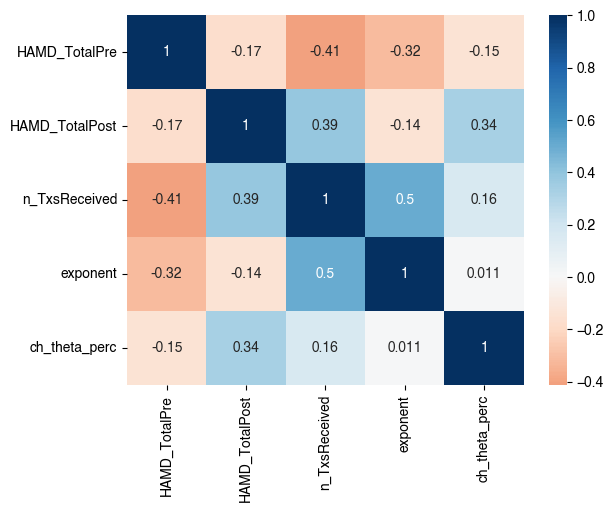

In [24]:
sns.heatmap(ECT_clin_eeg_diff[features].corr(), cmap='RdBu', center=0, annot=True)

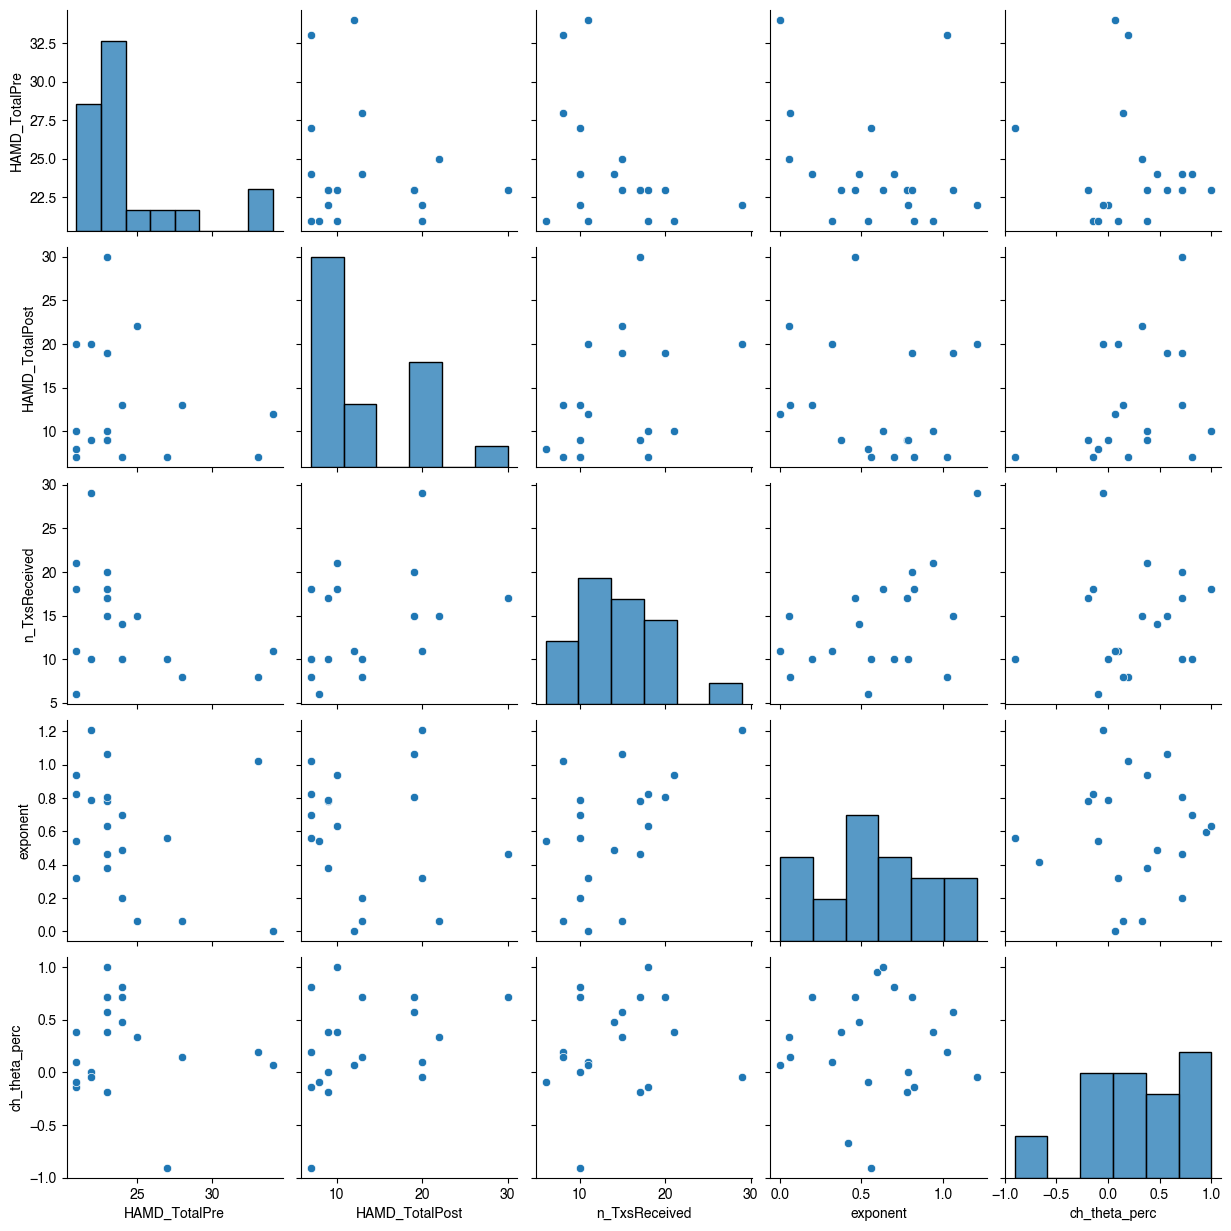

In [19]:
sns.pairplot(ECT_clin_eeg_diff[features])